In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font',family='Malgun Gothic')
import seaborn as sns
import pandas as pd
import scipy.stats as stats

### Delivery List data set 1

In [2]:
df_DL=pd.read_csv('../../datasets/DeliveryList.csv')
df_DL[:3]

,날짜,상품명,바코드,발주가능상태,입고수량,카테고리,출고수량
0,2019-05-16,V2_0,8.801047e+12,발주가능,384,세탁세제,72
1,2019-05-16,V2_3,8.801047e+12,발주가능,207,세탁세제,5
2,2019-05-16,V2_7,8.801047e+12,발주가능,520,헤어케어,19


In [3]:
## dtype 및 null 값 확인
df_DL.info() ## 날짜 data 이용하기

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   날짜      15000 non-null  object 
 1   상품명     15000 non-null  object 
 2   바코드     14992 non-null  float64
 3   발주가능상태  15000 non-null  object 
 4   입고수량    15000 non-null  int64  
 5   카테고리    15000 non-null  object 
 6   출고수량    15000 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 820.4+ KB


In [4]:
df_DL.describe(include=object) ## 2019-05-26 이런 형식은 주단위, 분기 단위를 사용하기 어려움.

,날짜,상품명,발주가능상태,카테고리
count,15000,15000,15000,15000
unique,84,528,3,8
top,2019-05-26,V2_114,발주가능,세탁세제
freq,226,47,14700,4265


In [5]:
df_DL['날짜_datetime']=pd.to_datetime(df_DL['날짜'])

In [6]:
df_DL.describe(include=datatime)

NameError: name 'datatime' is not defined

In [8]:
df_DL[:2]

,날짜,상품명,바코드,발주가능상태,입고수량,카테고리,출고수량,날짜_datetime
0,2019-05-16,V2_0,8.801047e+12,발주가능,384,세탁세제,72,2019-05-16
1,2019-05-16,V2_3,8.801047e+12,발주가능,207,세탁세제,5,2019-05-16


In [9]:
df_DL['날짜_datetime_month']=df_DL['날짜_datetime'].dt.month #붙이기 

<Axes: xlabel='날짜_datetime_month'>

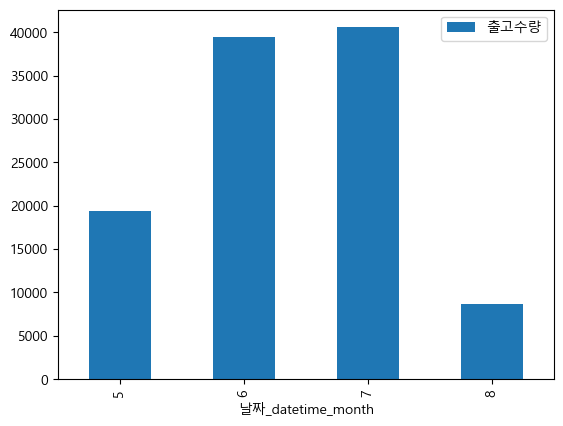

In [10]:
pd.pivot_table(data=df_DL, index='날짜_datetime_month', values='출고수량', aggfunc=sum).plot(kind='bar')
# 1차방법(2차 데이터 사용시) 단순히 시각화 

<Axes: xlabel='날짜_datetime_month', ylabel='출고수량'>

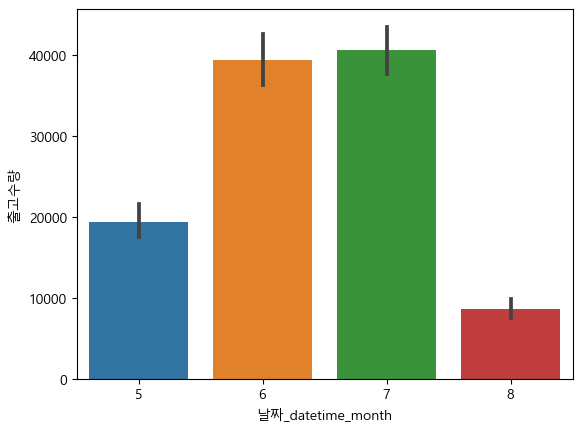

In [11]:
sns.barplot(data=df_DL, x='날짜_datetime_month', y='출고수량', estimator=sum)

In [12]:
df_DL['날짜_datetime_week'] = df_DL['날짜_datetime'].dt.isocalendar().week #몇 째주인지 말해줌

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

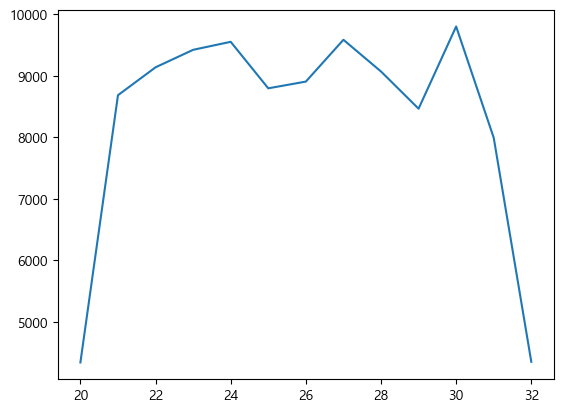

In [13]:
sns.lineplot(data=df_DL, x='날짜_datetime_week', y='출고수량', estimator=sum)

### Delivery List dataset 2 

In [10]:
df_DL2=pd.read_csv('../../datasets/DeliveryList2.csv')
df_DL2[:3]

,결제수단,배송번호,배송시작일,배송완료일,상품구매금액,상품번호,수량,주문경로,주문일
0,무통장입금,D-20181227-0000648-00,2019-01-07 오전 8:56,2019-01-11 오전 5:32,71450,1077.0,1,PC쇼핑몰,20181227
1,무통장입금,D-20181229-0000119-00,2019-01-03 오전 9:30,2019-01-07 오전 5:32,141240,42.0,2,모바일웹,20181229
2,무통장입금,D-20181230-0000100-00,2019-01-03 오전 9:30,2019-01-07 오전 5:32,13910,1271.0,1,모바일웹,20181230


In [11]:
df_DL2.describe(datetime_is_numeric=True)

,상품구매금액,상품번호,수량,주문일
count,4.674900e+04,46661.000000,46749.000000,4.674900e+04
mean,6.936814e+04,763.193073,1.177822,2.018404e+07
std,6.611247e+04,456.323734,0.683334,5.192403e+03
min,0.000000e+00,38.000000,1.000000,2.017010e+07
25%,3.288000e+04,378.000000,1.000000,2.018073e+07
50%,6.778000e+04,928.000000,1.000000,2.018112e+07
75%,9.213000e+04,1209.000000,1.000000,2.019022e+07
max,4.963400e+06,1681.000000,50.000000,2.019062e+07


#### int형은 string and then datetime 순서로 변환

In [13]:
# 변수의 갯수가 똑같아야 마이너스 가능 
df_DL2['주문일'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 46749 entries, 0 to 46748
Series name: 주문일
Non-Null Count  Dtype
--------------  -----
46749 non-null  int64
dtypes: int64(1)
memory usage: 365.4 KB


In [14]:
pd.to_datetime(df_DL2['주문일'])

0       1970-01-01 00:00:00.020181227
1       1970-01-01 00:00:00.020181229
2       1970-01-01 00:00:00.020181230
3       1970-01-01 00:00:00.020181231
4       1970-01-01 00:00:00.020181231
                     ...             
46744   1970-01-01 00:00:00.020171229
46745   1970-01-01 00:00:00.020171229
46746   1970-01-01 00:00:00.020171230
46747   1970-01-01 00:00:00.020171231
46748   1970-01-01 00:00:00.020171231
Name: 주문일, Length: 46749, dtype: datetime64[ns]

### 특정 기호가 들어간 string인 경우 apply()적용후 datetime 변환

In [19]:
# str('2019-01-11 오전 5:32')[:10] = (datetime_str)
def slicing_YMD(datetime_str):
    return datetime_str[:10]

In [21]:
df_DL2['배송시작일_datetime']=pd.to_datetime(df_DL2['배송시작일'].apply(slicing_YMD))
df_DL2['배송완료일_datetime']=pd.to_datetime(df_DL2['배송완료일'].apply(slicing_YMD))

In [25]:
df_DL2[['배송시작일_datetime','배송완료일_datetime']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46749 entries, 0 to 46748
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   배송시작일_datetime  46749 non-null  datetime64[ns]
 1   배송완료일_datetime  46749 non-null  datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 730.6 KB


In [28]:
df_DL2['배송_duration'] = df_DL2['배송완료일_datetime']-df_DL2['배송시작일_datetime']

In [30]:
df_DL2['배송_duration'].describe()

count                        46749
mean     4 days 04:38:57.008278251
std      1 days 04:56:12.144368428
min                0 days 00:00:00
25%                4 days 00:00:00
50%                4 days 00:00:00
75%                4 days 00:00:00
max               47 days 00:00:00
Name: 배송_duration, dtype: object